In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import os
import sys
%matplotlib inline

In [2]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [6]:
# cab_data = pd.read_csv()
cab_data = import_data('uberdata/cab_rides.csv')
cab_data.head()
wether_data = import_data('uberdata/weather.csv')
wether_data.head()

Memory usage of dataframe is 52.88 MB
Memory usage after optimization is: 37.85 MB
Decreased by 28.4%
Memory usage of dataframe is 0.38 MB
Memory usage after optimization is: 0.10 MB
Decreased by 73.3%


,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.40625,Back Bay,1.0,1012.0,0.122803,1545003901,0.770020,11.250000
1,42.43750,Beacon Hill,1.0,1012.0,0.184570,1545003901,0.759766,11.320312
2,42.50000,Boston University,1.0,1012.0,0.108887,1545003901,0.759766,11.070312
3,42.12500,Fenway,1.0,1012.0,0.096924,1545003901,0.770020,11.093750
4,43.12500,Financial District,1.0,1012.0,0.178589,1545003901,0.750000,11.492188


In [7]:
cab_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.439941,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.439941,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.439941,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.439941,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.439941,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [9]:
cab_data['datetime'] = pd.to_datetime(cab_data['time_stamp'])
wether_data['data_time']=pd.to_datetime(wether_data['time_stamp'])

In [10]:
a = pd.concat([cab_data, wether_data])

In [12]:
a.shape

(699347, 19)

In [17]:
a['day'] = a.data_time.dt.day
a['hour'] = a.data_time.dt.hour


In [19]:
a.fillna(0, inplace=True)
a.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,temp,location,clouds,pressure,rain,humidity,wind,data_time,day,hour
6271,0.0,0,1.543820e+09,0,0,0.0,0.0,0,0,0,...,44.71875,North Station,0.890137,1000.5,0.0,0.959961,1.519531,1970-01-01 00:00:01.543819974,1.0,0.0
6272,0.0,0,1.543820e+09,0,0,0.0,0.0,0,0,0,...,44.84375,Northeastern University,0.879883,1000.5,0.0,0.959961,1.540039,1970-01-01 00:00:01.543819974,1.0,0.0
6273,0.0,0,1.543820e+09,0,0,0.0,0.0,0,0,0,...,44.81250,South Station,0.890137,1000.5,0.0,0.959961,1.540039,1970-01-01 00:00:01.543819974,1.0,0.0
6274,0.0,0,1.543820e+09,0,0,0.0,0.0,0,0,0,...,44.78125,Theatre District,0.890137,1000.5,0.0,0.959961,1.540039,1970-01-01 00:00:01.543819974,1.0,0.0
6275,0.0,0,1.543820e+09,0,0,0.0,0.0,0,0,0,...,44.68750,West End,0.890137,1000.5,0.0,0.959961,1.519531,1970-01-01 00:00:01.543819974,1.0,0.0


In [20]:
a.groupby('cab_type').count()

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,data_time,day,hour
cab_type,,,,,,,,,,,,,,,,,,,,
0,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663


<AxesSubplot:xlabel='cab_type'>

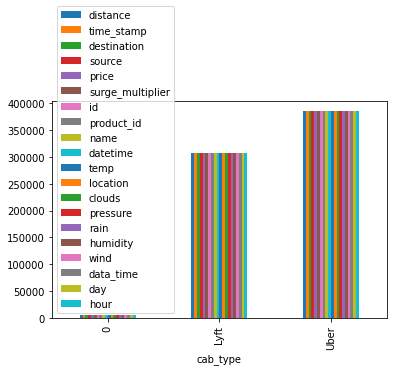

In [21]:
a.groupby('cab_type').count().plot.bar()

<AxesSubplot:>

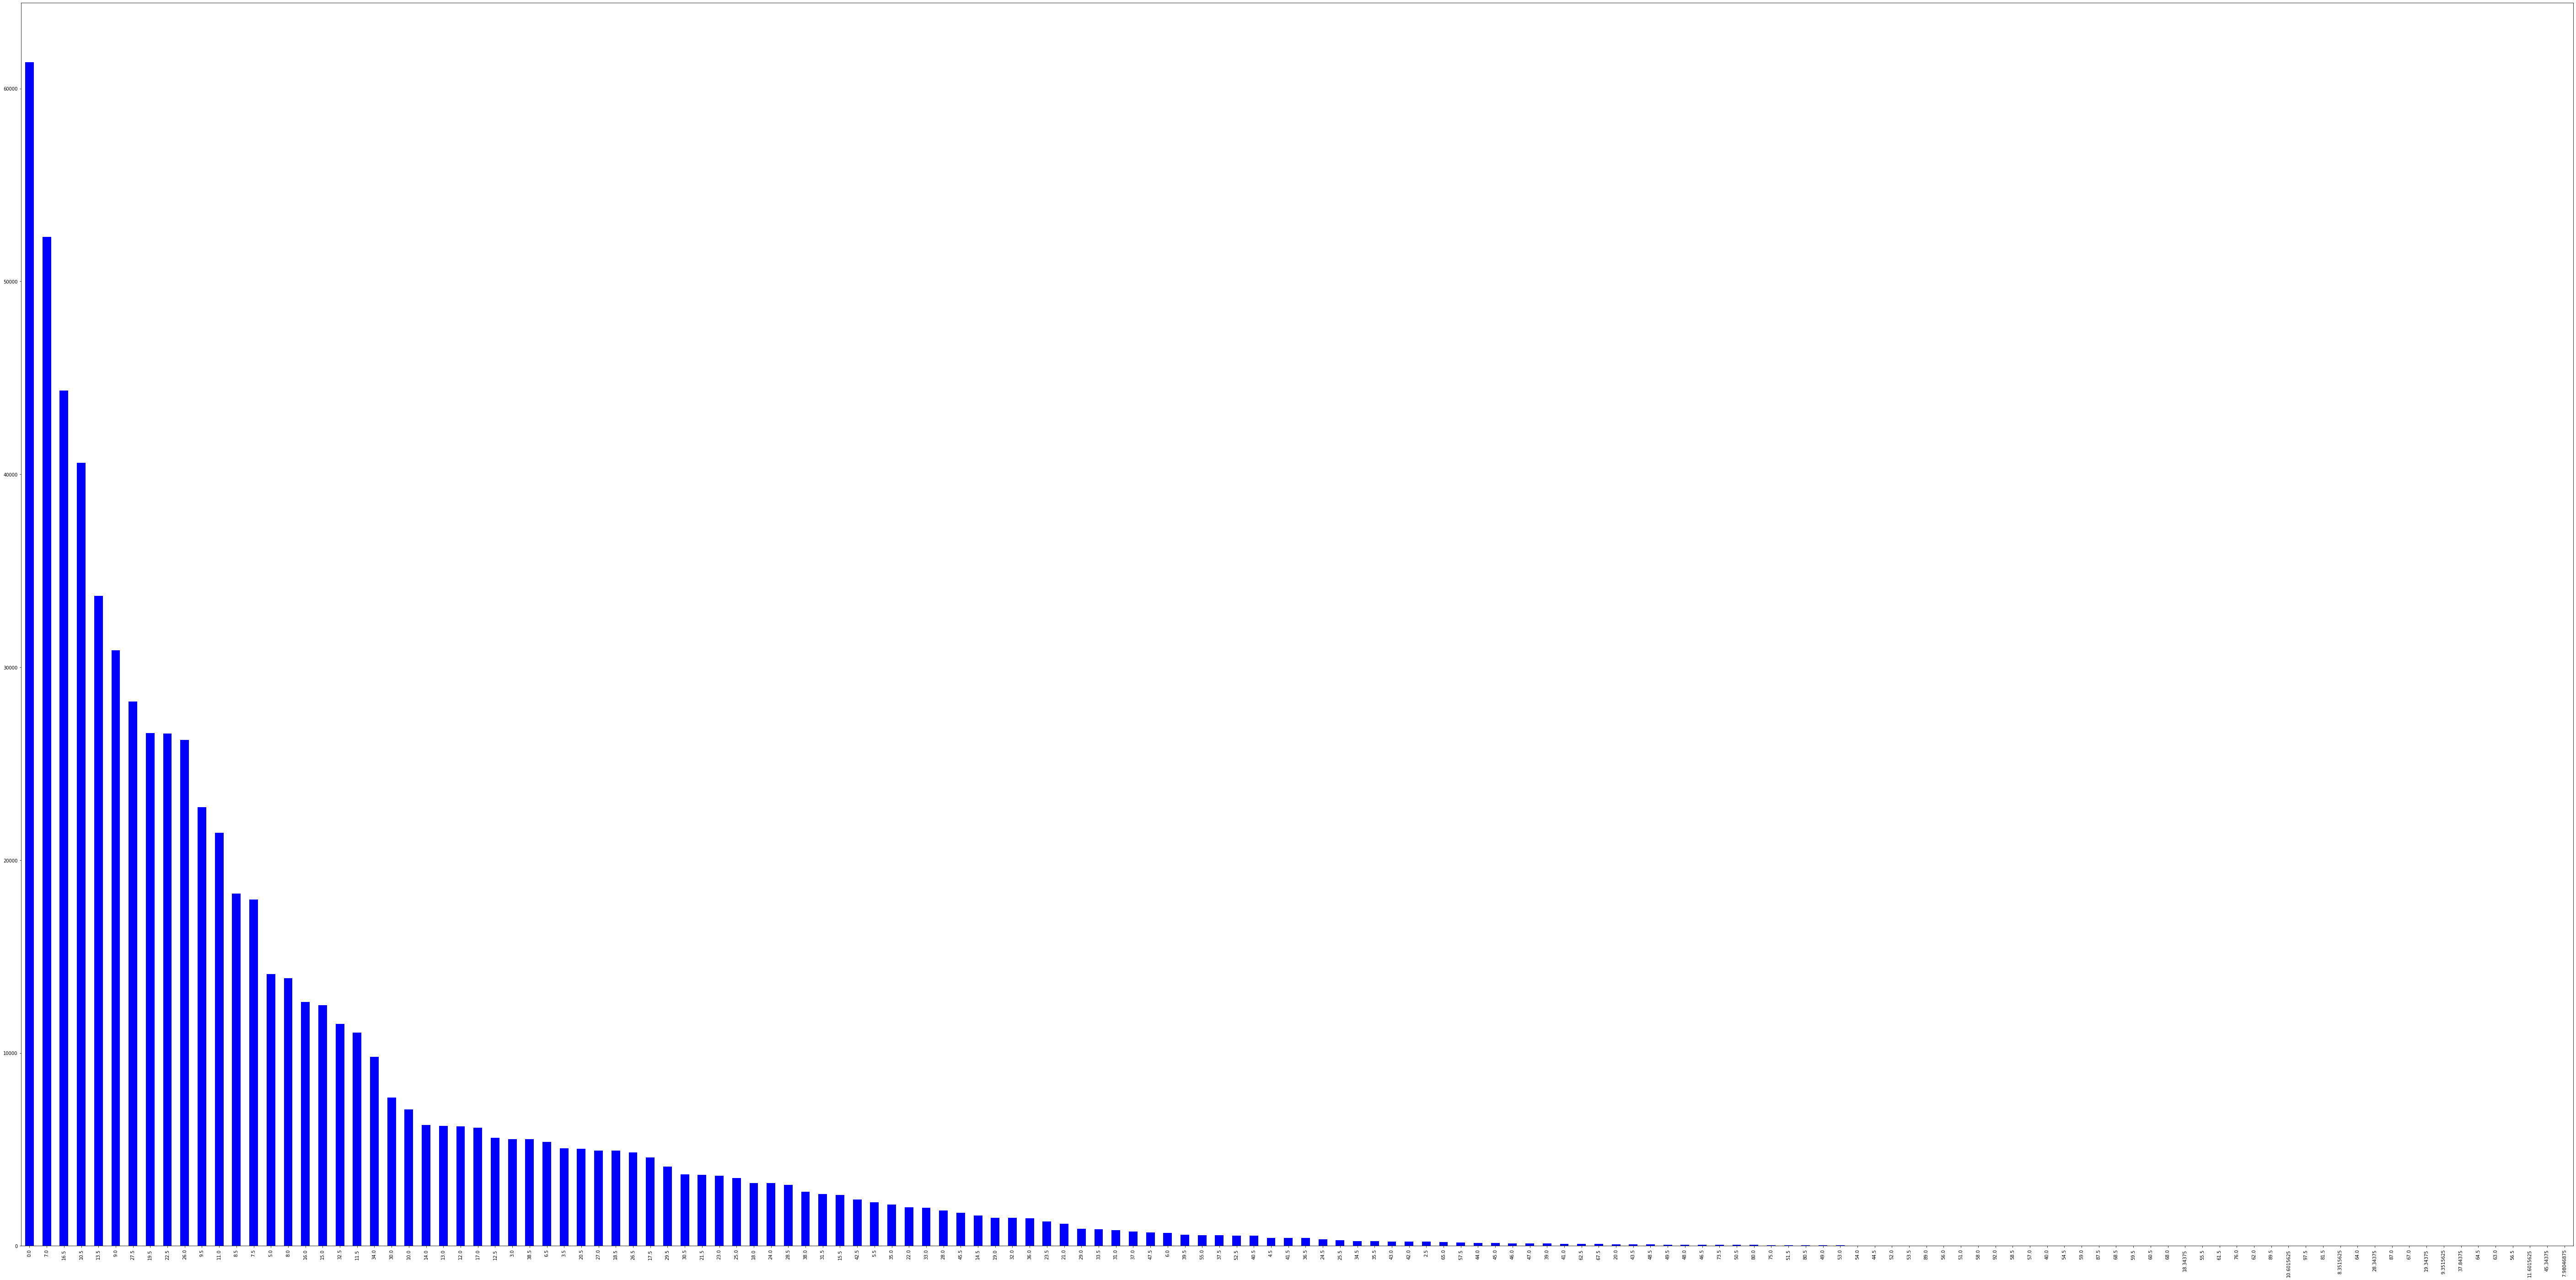

In [25]:
a['price'].value_counts().plot(kind='bar', figsize=(100, 50), color='blue')

<AxesSubplot:>

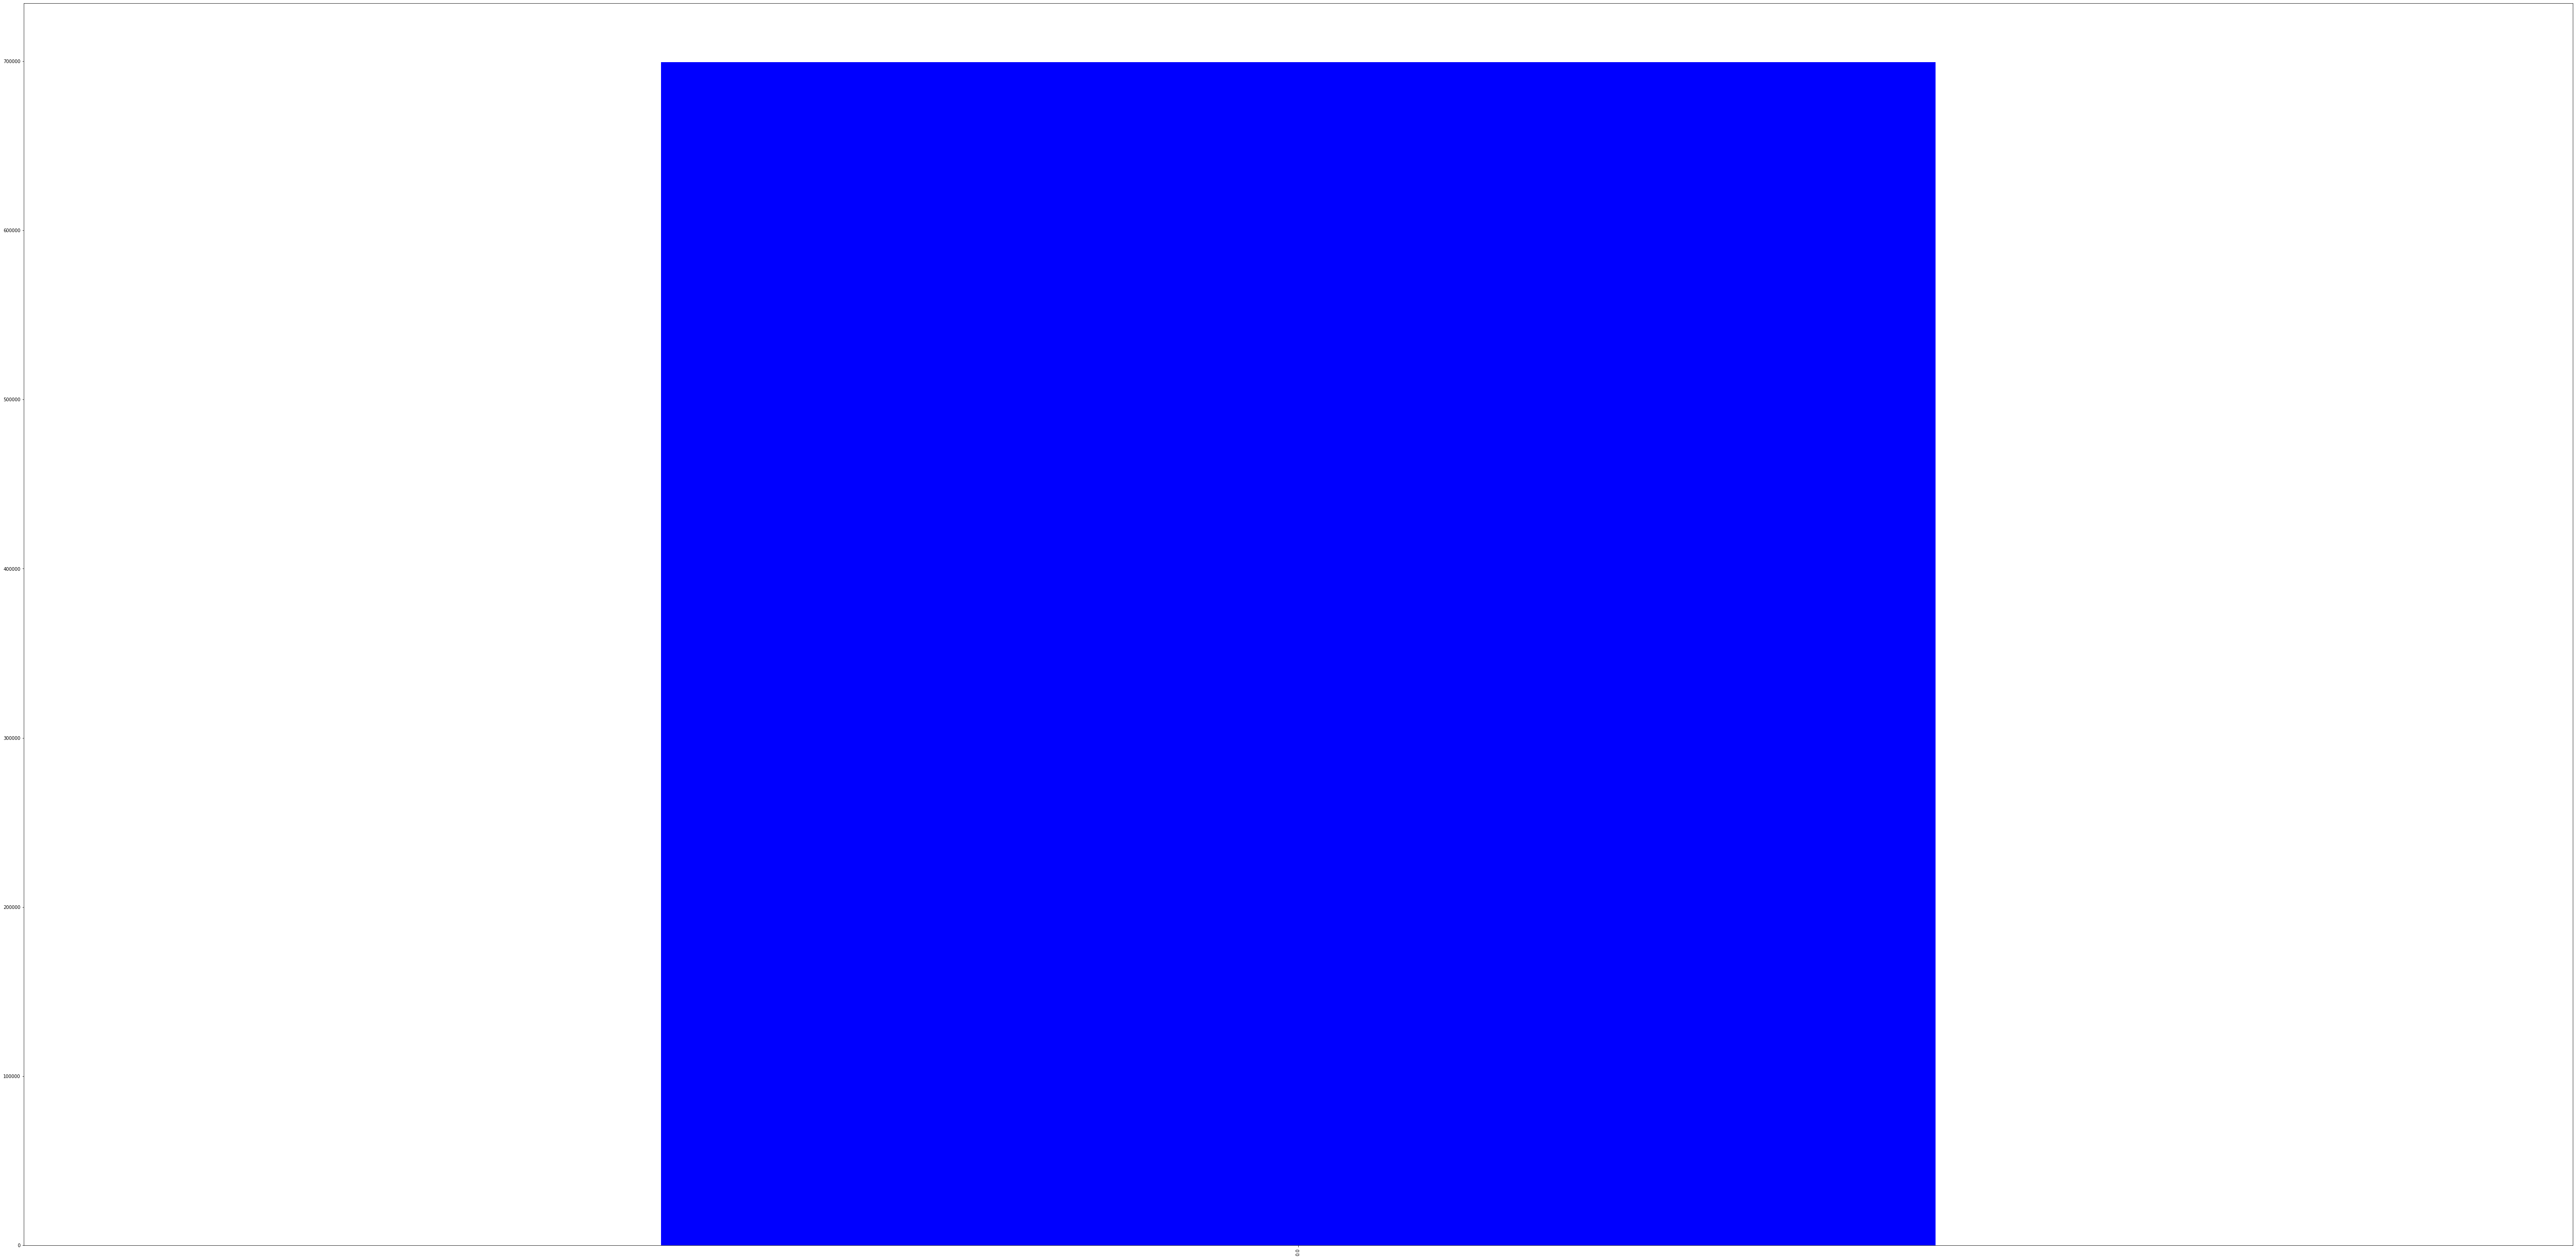

In [26]:
a['hour'].value_counts().plot(kind='bar', figsize=(100, 50), color='blue')

In [27]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'data_time', 'day', 'hour'],
      dtype='object')

In [46]:
X1 = a[['distance', 'temp', 'pressure', 'humidity', 'wind', 'rain', 'day', 'hour', 'surge_multiplier','clouds']]
Y1 = a['price']


0        5.0
1       11.0
2        7.0
3       26.0
4        9.0
        ... 
6271     0.0
6272     0.0
6273     0.0
6274     0.0
6275     0.0
Name: price, Length: 699347, dtype: float16

In [40]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.25, random_state=42)
X_train

,distance,temp,pressure,humidity,wind,rain,day,hour,surge_multiplier,clouds
347989,2.480469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
418898,2.320312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
652636,0.620117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
505391,1.299805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
443901,0.560059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
259178,4.398438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
365838,0.910156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
131932,0.649902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
671155,3.080078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
linear = LinearRegression()

linear.fit(X_train, y_train)

LinearRegression()

In [51]:
prediction = linear.predict(X_test)

In [54]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':prediction})
df

,Actual,Predicted
81607,42.5,32.546648
354,0.0,14.757153
471801,32.5,16.814911
407645,27.5,10.480097
474760,27.5,10.556517
...,...,...
538489,7.5,10.708737
579511,13.5,15.517628
5421,9.0,11.829569
279982,8.0,11.854421


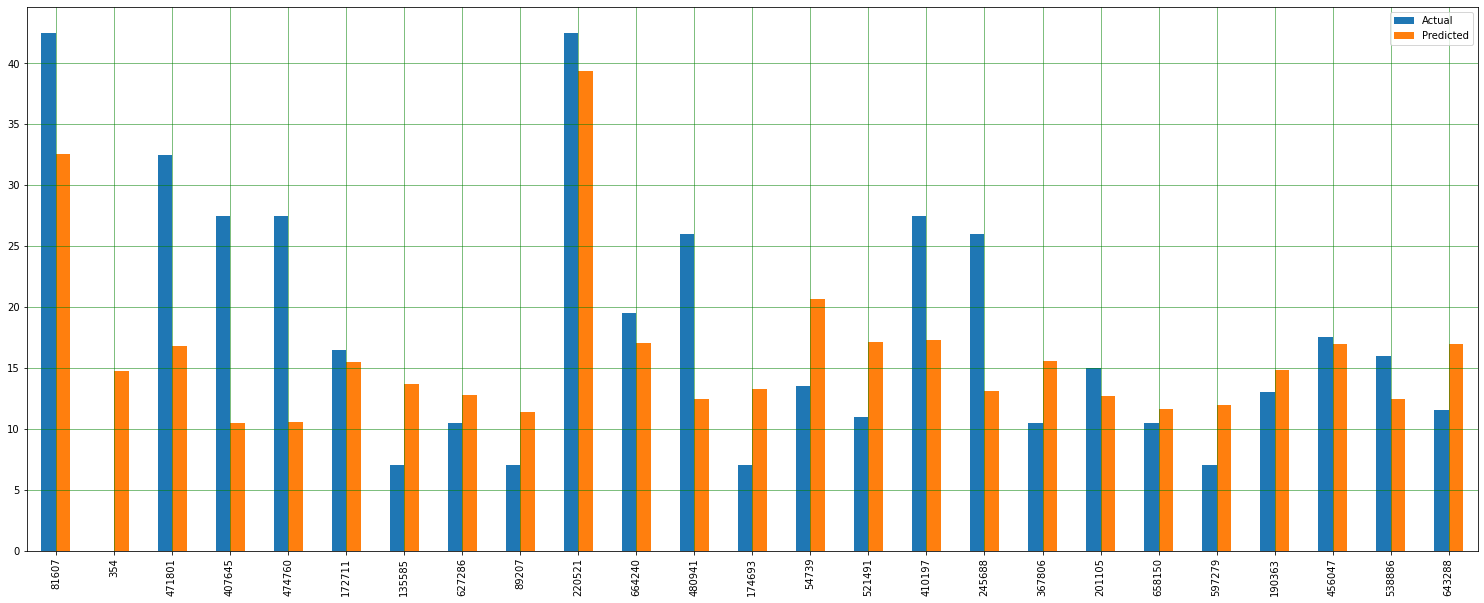

In [57]:
df1 = df.head(25)
df1.plot(kind = 'bar', figsize=(26,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()